## Introduction
in this notebook I will do some experiments to figure out the best Machine Learning algorithm on this data and try to tune them to get highest success.
After tuning I will compare them to find best one of the following 6 models.

#### Data Analysis
#### Data visualization
#### Data preprocessing
#### Machine Learning Models

    1- Logistic Regression
    2- KNN
    3- SVM
    4- Random Forest
    5- Decision Tree
    6- Naive Bayes

Results and Comparisons with model performance 



##### 1- Exploratory Data Analysis

In [1]:
import numpy as np         # linear algebra
import pandas as pd        # data processing
import seaborn as sns      # wrapper library for visualization
import matplotlib.pyplot as plt     # library for data visualization basics plotly
from matplotlib.ticker import FormatStrFormatter
import pandas_profiling                 # for Analysis data 


##### Loading the dataset


In [2]:
df = pd.read_csv("pulsar_stars.csv")

In [3]:
df.head(10)      # Investigating the Dataset

Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   
5                        93.570312   
6                       119.484375   
7                       130.382812   
8                       107.250000   
9                       107.257812   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   
5                                      46.698114   
6                                      48.765059   
7                                      39.844056   
8                                      52.627078   
9                                      39.496488   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   
5                                    0.531905   
6                                    0.031460   
7                                   -0.158323   
8                                    0.452688   
9                                    0.465882   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                            -0.515088                   1.677258   
2                             1.051164                   3.121237   
3                            -0.636238                   3.642977   
4                             1.123492                   1.178930   
5                             0.416721                   1.636288   
6                            -0.112168                   0.999164   
7                             0.389540                   1.220736   
8                             0.170347                   2.331940   
9                             1.162877                   4.079431   

    Standard deviation of the DM-SNR curve  \
0                                19.110426   
1                                14.860146   
2                                21.744669   
3                                20.959280   
4                                11.468720   
5                                14.545074   
6                                 9.279612   
7                                14.378941   
8                                14.486853   
9                                24.980418   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   
5                             10.621748                     131.394004   
6                             19.206230                     479.756567   
7                             13.539456                     198.236457   
8                              9.001004                     107.972506   
9                              7.397080                      57.784738   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0

# Data Analysis

In [4]:
# Looking to Dtypes and amounts of values
# information about data types and amount of non-null rows of our Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


It turns out that the information contained in it is not wrong, is not empty and does not need to be cleaned

#### Statistical Investigation

In [5]:
df.describe()

Mean of the integrated profile  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                17898.000000   
mean                                     0.477857   
std                                      1.064040   
min                                     -1.876011   
25%                                      0.027098   
50%                                      0.223240   
75%                                      0.473325   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         17898.000000               17898.000000   
mean                              1.770279                  12.614400   
std                               6.167913                  29.472897   
min                              -1.791886                   0.213211   
25%                              -0.188572                   1.923077   
50%                               0.198710                   2.801839   
75%                               0.927783                   5.464256   
max                              68.101622                 223.392141   

        Standard deviation of the DM-SNR curve  \
count                             17898.000000   
mean                                 26.326515   
std                                  19.470572   
min                                   7.370432   
25%                                  14.437332   
50%                                  18.461316   
75%                                  28.428104   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          17898.000000                   17898.000000   
mean                               8.303556                     104.857709   
std                                4.506092                     106.514540   
min                               -3.139270                      -1.976976   
25%                                5.781506                      34.960504   
50%                                8.433515                      83.064556   
75%                               10.702959                     139.309330   
max                               34.539844                    1191.000837   

       target_class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

This curve seems to be a normal distribution. which is symmetric about the mean and regular thickness of tails

1. Mean
        Since mean is close to 50% mark and 25% and 75% are within 1 std. dev. from the mean. Large difference between min and max, hence larger std. dev. Hence the mean of the integrated profile seems volatile with a large standard deviation.

2. Std. Dev
        Since mean is close to 50% mark and 25% and 75% are within less than 1 std. dev. from the mean, this data is normally distributed. The max and min values are 3-4 standard deviations from the mean.

3. Missing Values
        Majority of this data (atleast 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. This means the integrated profile's tails are generally the same size as normal distributions.

4. Skewness
        Majority of this data (definitely more 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. Hence the integrated profile must not be very skewed.
        
5. DM-SNR Curve
        This curve is expected to be more highly spread than a normal distribution, and skewed towards the right of the mean.

    -Mean
    Standard deviation of the mean is very high, with more than 75% values being less than mean
    Hence mean of most curves are small

    -Std. Dev (Missing Values)
    Very skewed towards the higher side. 
    Can expect most values to have standard deviation lower than 28. However, comparing this with the distribution       of DM-SNR curve, which is mostly less than 5. This is a very highly spread DM-SNR curve.

    -Excess Kurtosis
    This is normally distributed since mean = 50% value and every 25% is approx one std. dev. However, these values       are high, hence the DM-SNR curve has fatter tails than normal distribution.

    -Skewness (Missing Values)
    Very high values, and high standard deviation. Hence the DM-SNR curve is very skewed (expected)


In [6]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

#### correlation between fields

In [8]:
df.corr()

Mean of the integrated profile  \
 Mean of the integrated profile                                       1.000000   
 Standard deviation of the integrated profile                         0.547137   
 Excess kurtosis of the integrated profile                           -0.873898   
 Skewness of the integrated profile                                  -0.738775   
 Mean of the DM-SNR curve                                            -0.298841   
 Standard deviation of the DM-SNR curve                              -0.307016   
 Excess kurtosis of the DM-SNR curve                                  0.234331   
 Skewness of the DM-SNR curve                                         0.144033   
target_class                                                         -0.673181   

                                                Standard deviation of the integrated profile  \
 Mean of the integrated profile                                                     0.547137   
 Standard deviation of the integrated profile                                       1.000000   
 Excess kurtosis of the integrated profile                                         -0.521435   
 Skewness of the integrated profile                                                -0.539793   
 Mean of the DM-SNR curve                                                           0.006869   
 Standard deviation of the DM-SNR curve                                            -0.047632   
 Excess kurtosis of the DM-SNR curve                                                0.029429   
 Skewness of the DM-SNR curve                                                       0.027691   
target_class                                                                       -0.363708   

                                                Excess kurtosis of the integrated profile  \
 Mean of the integrated profile                                                 -0.873898   
 Standard deviation of the integrated profile                                   -0.521435   
 Excess kurtosis of the integrated profile                                       1.000000   
 Skewness of the integrated profile                                              0.945729   
 Mean of the DM-SNR curve                                                        0.414368   
 Standard deviation of the DM-SNR curve                                          0.432880   
 Excess kurtosis of the DM-SNR curve                                            -0.341209   
 Skewness of the DM-SNR curve                                                   -0.214491   
target_class                                                                     0.791591   

                                                Skewness of the integrated profile  \
 Mean of the integrated profile                                          -0.738775   
 Standard deviation of the integrated profile                            -0.539793   
 Excess kurtosis of the integrated profile                                0.945729   
 Skewness of the integrated profile                                       1.000000   
 Mean of the DM-SNR curve                                                 0.412056   
 Standard deviation of the DM-SNR curve                                   0.415140   
 Excess kurtosis of the DM-SNR curve                                     -0.328843   
 Skewness of the DM-SNR curve                                            -0.204782   
target_class                                                              0.709528   

                                                Mean of the DM-SNR curve  \
 Mean of the integrated profile                                -0.298841   
 Standard deviation of the integrated profile                   0.006869   
 Excess kurtosis of the integrated profile                      0.414368   
 Skewness of the integrated profile                             0.412056   
 Mean of the DM-SNR curve                                       1.000000   
 Standard deviatio

Following shows correlation between features.

There is a high positive correlation between following features:

    Excess kurtosis of the integrated profile - Skewness of the integrated profile (0.94)
    Mean of the DM-SNR curve - Standard deviation of the DM-SNR curve(0.79)
    Excess kurtosis of the DM-SNR curve - Skewness of the DM-SNR curve (0.92)

There is a high negative correlation between following features:

    Mean of the integrated profile - Excess kurtosis of the integrated profile (-0.87)
    Mean of the integrated profile - Skewness of the integrated profile (-0.73)
    Standard deviation of the DM-SNR curve - Excess kurtosis of the DM-SNR curve (-0.80)

In [9]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data visualization

#### correlation with heatmap

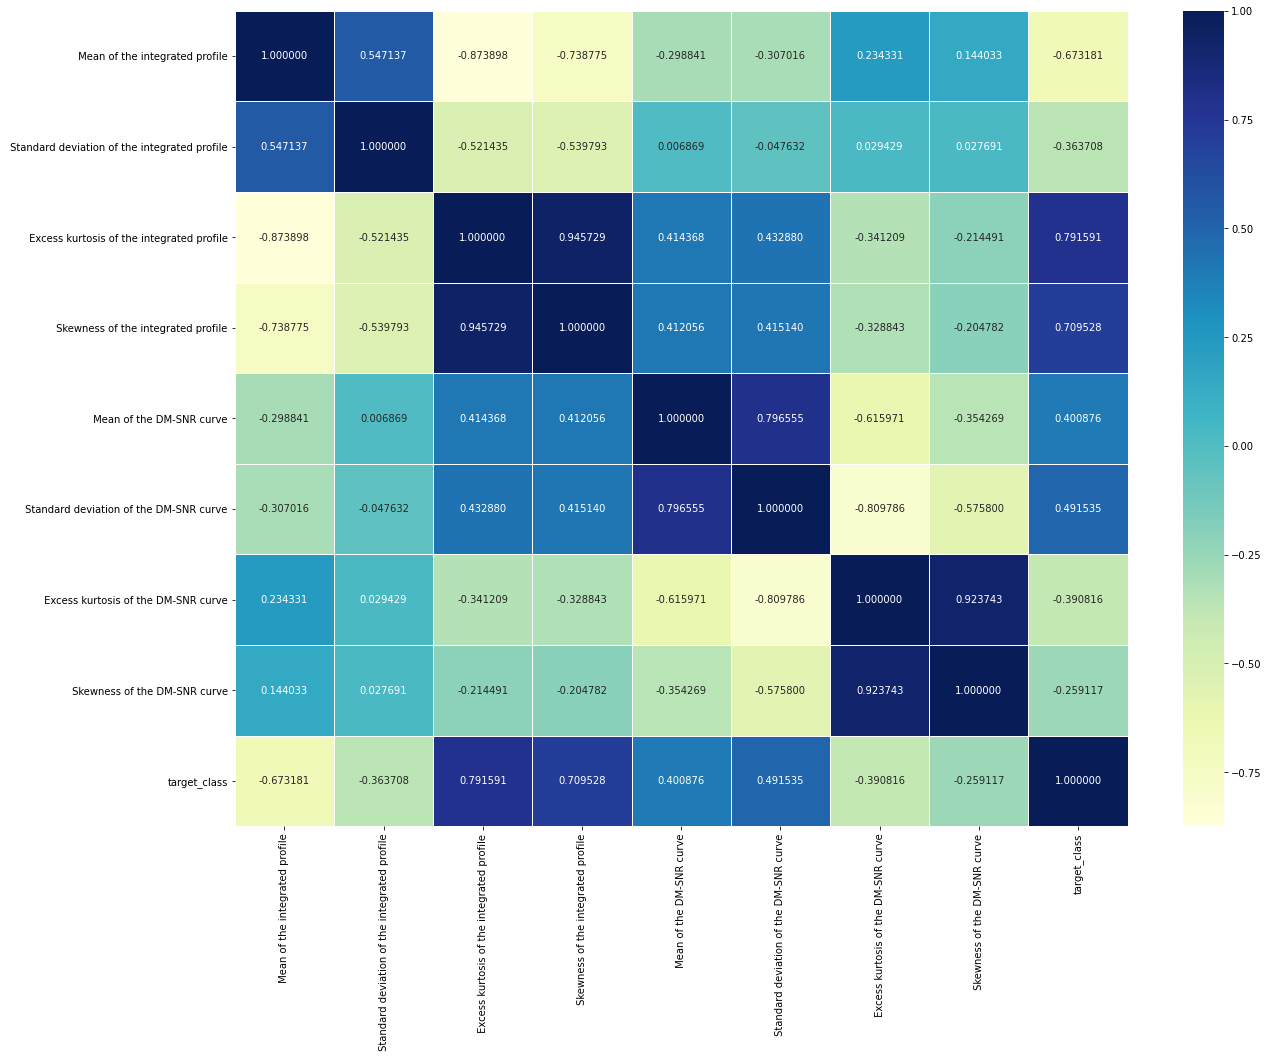

In [10]:
cor=df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(cor,annot=True,cmap="YlGnBu",linewidths=1,fmt=".6f")
plt.show()

#### Most of our Columns are already related or derived from one or another. And we can see it clearly on some Cells above


### PairPlot (each column is compared the others and itself)


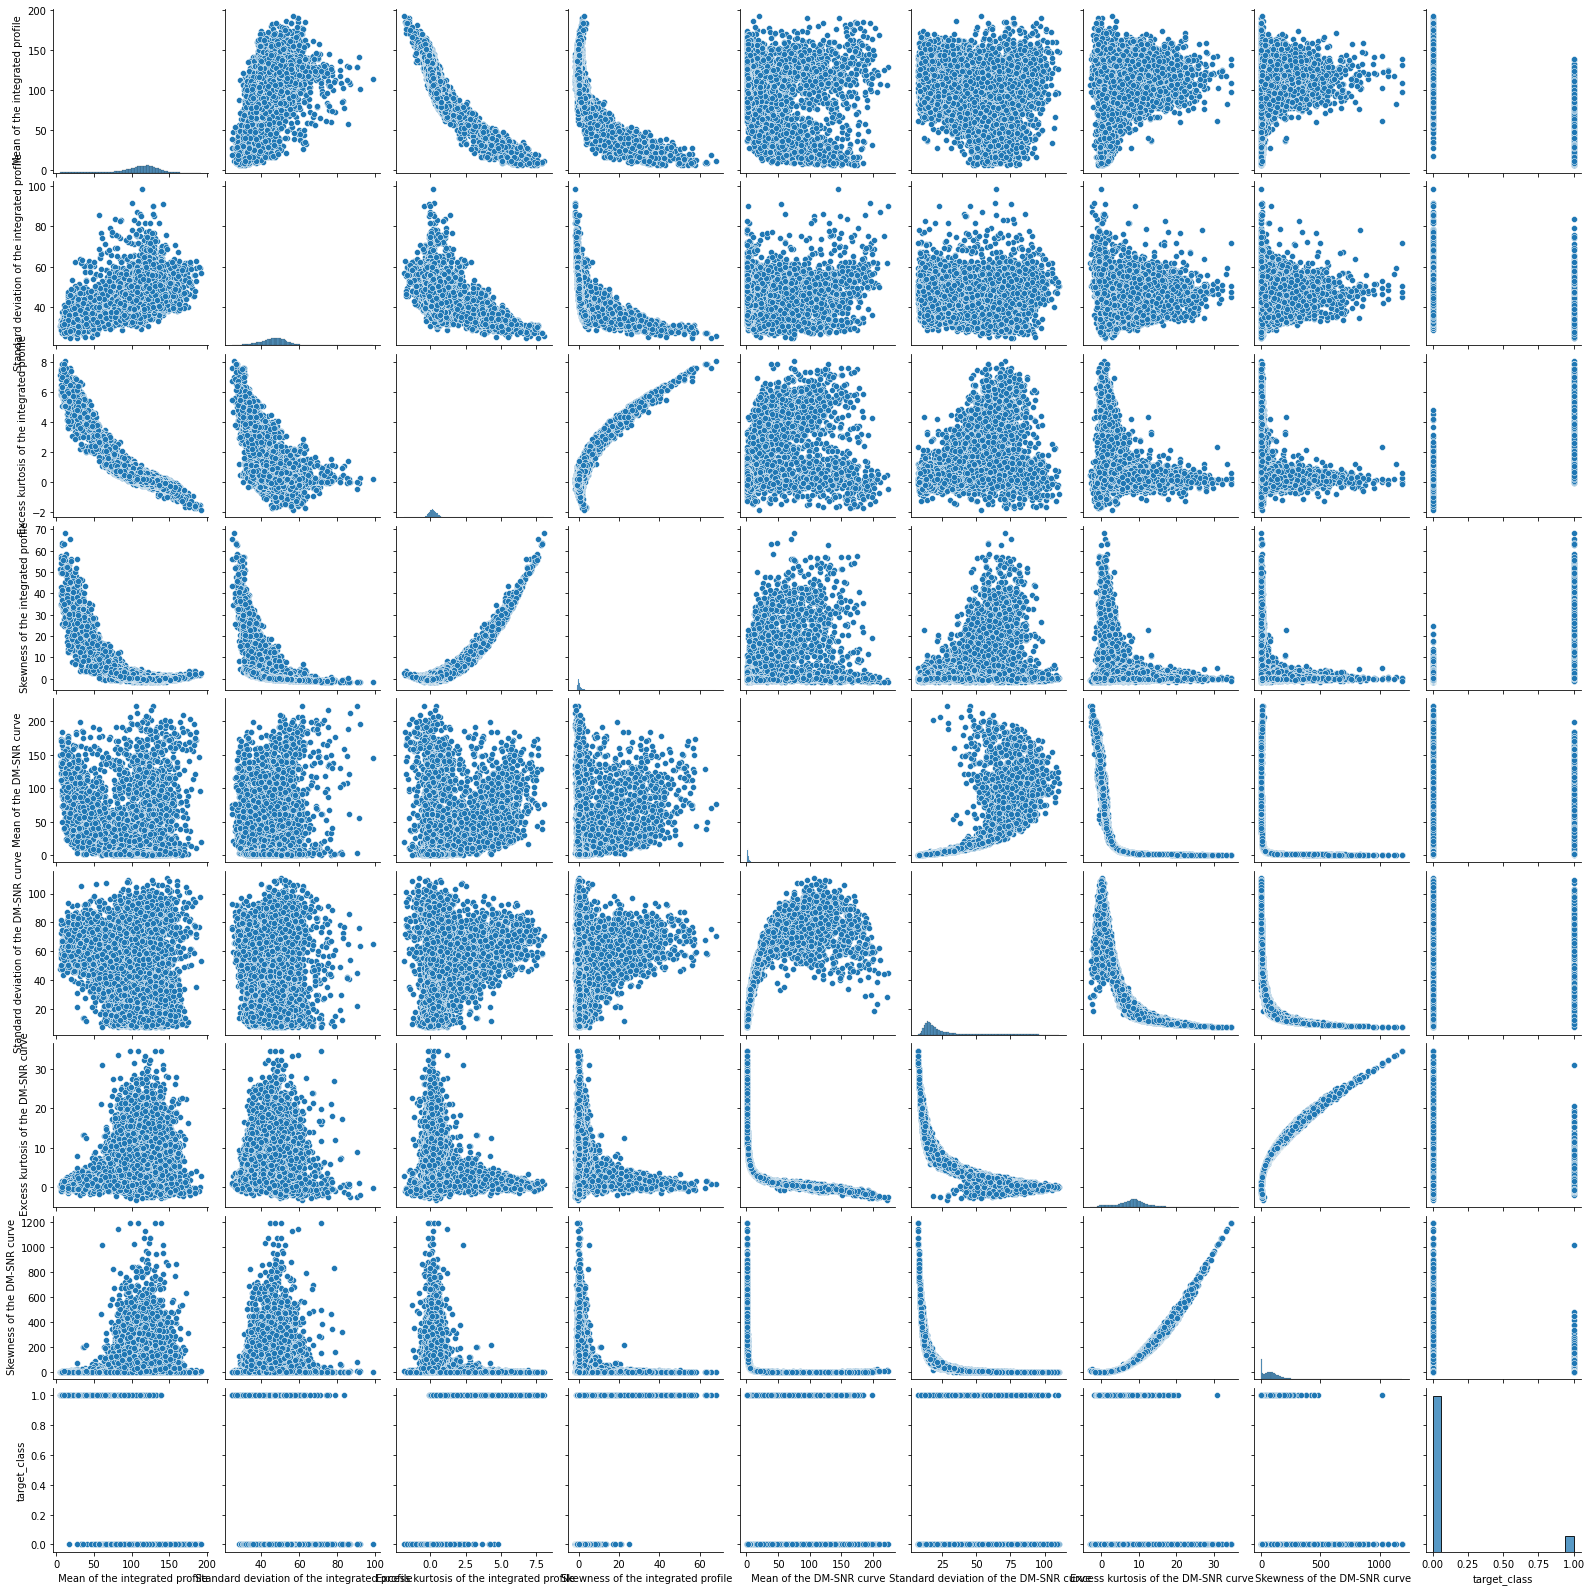

In [11]:
sns.pairplot(df)       # pairplot without standard deviaton fields of data

#### The ( PairPlot ) shows pair charts showing correlations between features with categories and the same Our data can be completely separated in most columns

array([[<AxesSubplot:title={'center':' Mean of the integrated profile'}>,
        <AxesSubplot:title={'center':' Standard deviation of the integrated profile'}>,
        <AxesSubplot:title={'center':' Excess kurtosis of the integrated profile'}>],
       [<AxesSubplot:title={'center':' Skewness of the integrated profile'}>,
        <AxesSubplot:title={'center':' Mean of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Standard deviation of the DM-SNR curve'}>],
       [<AxesSubplot:title={'center':' Excess kurtosis of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Skewness of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':'target_class'}>]], dtype=object)

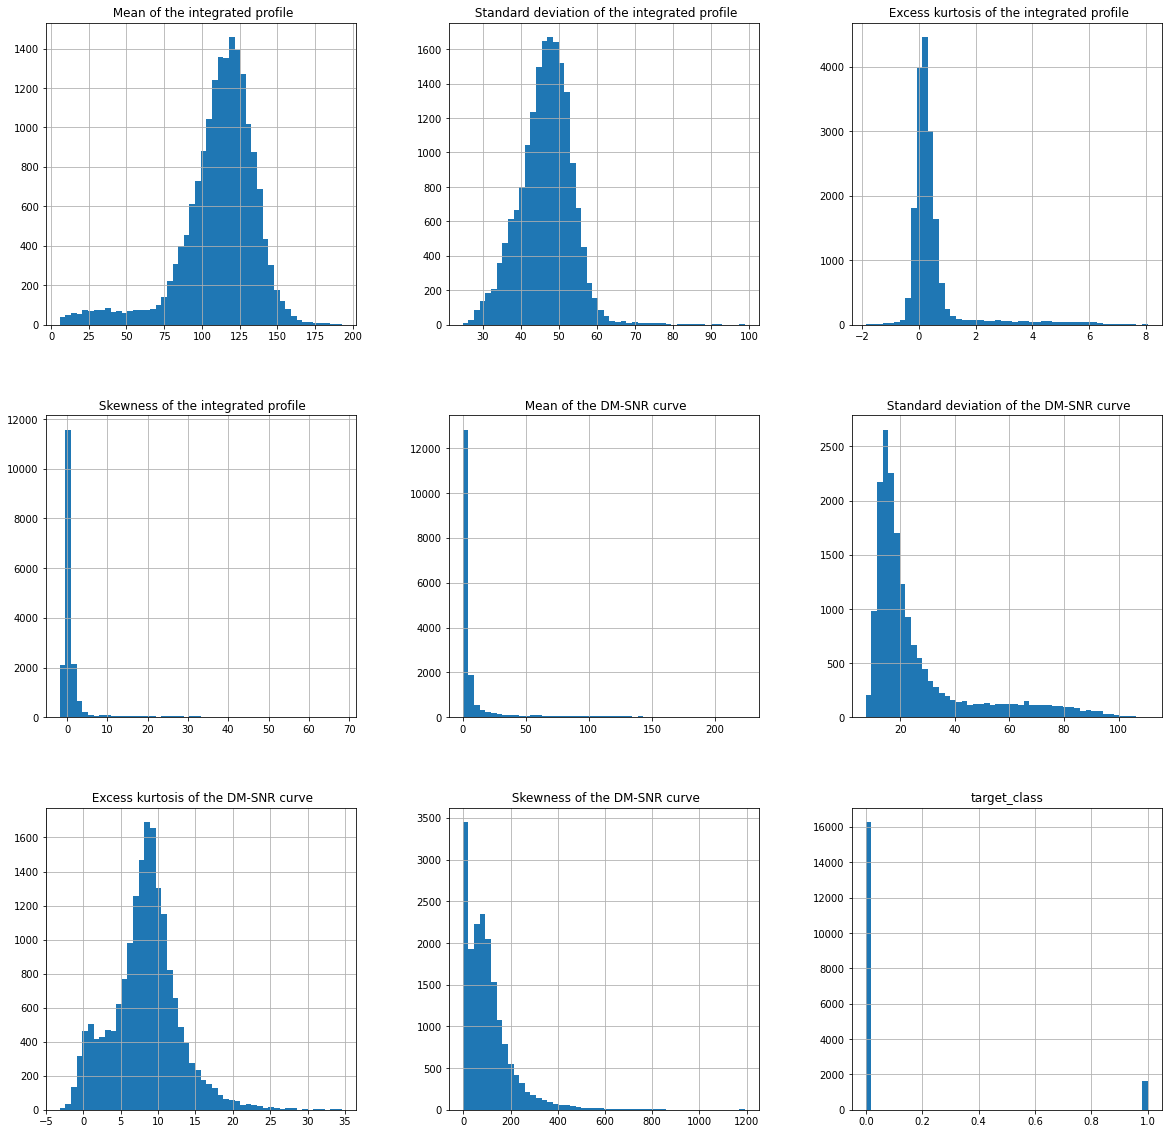

In [12]:
# Display the histogram to undestand the data
df.hist(bins=50, figsize=(20, 20))


#### Boxplot (act as a boxplot but we can see amounts too)


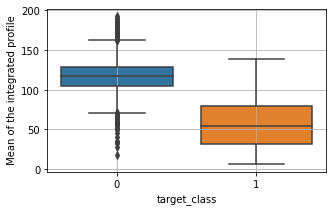

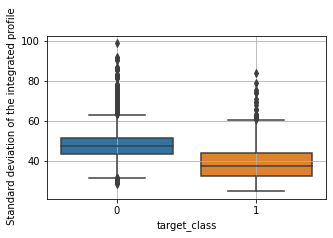

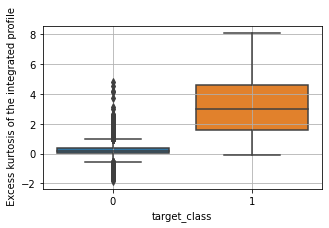

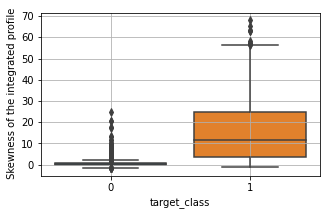

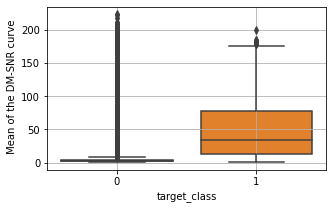

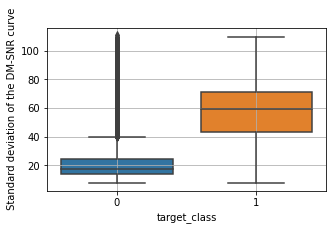

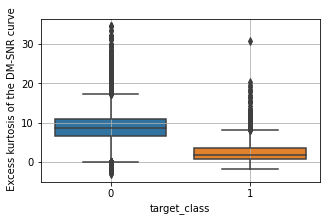

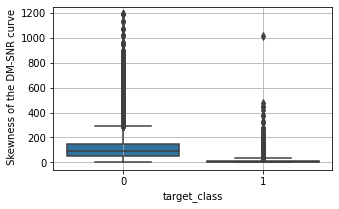

In [13]:
columns =df.columns[:-1]
# from matplotlib.ticker import FormatStrFormatter
for i in range(len(columns)):
    feature = columns[i]
    plt.figure(figsize = (5, 3))
    sns.boxplot(x = 'target_class', y = columns[i], data = df)
    plt.grid()
    plt.show()


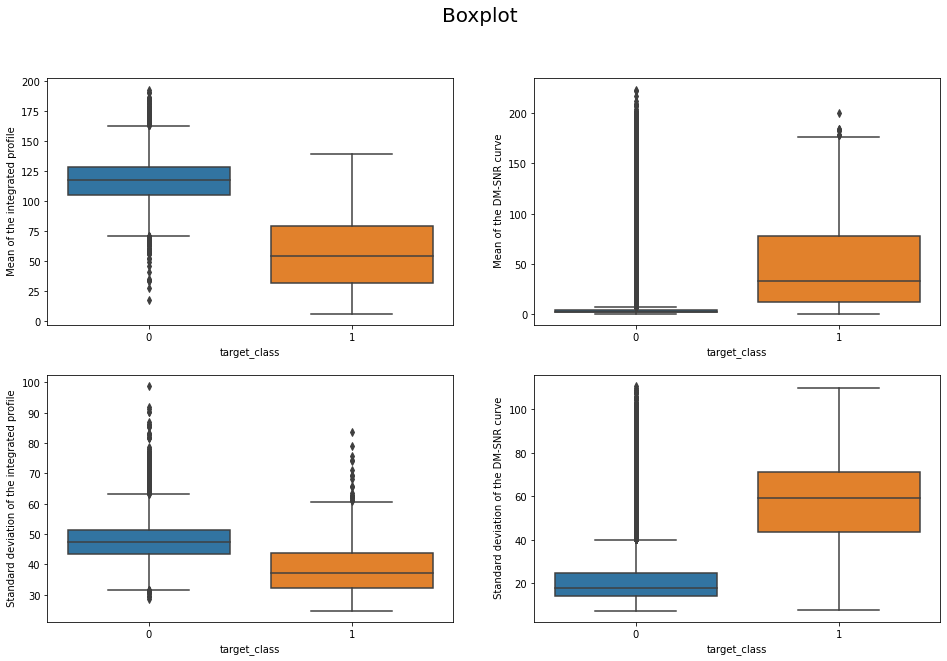

In [14]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.boxplot(data=df,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sns.boxplot(data=df,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sns.boxplot(data=df,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sns.boxplot(data=df,y=" Standard deviation of the DM-SNR curve",x="target_class")


plt.suptitle("Boxplot",fontsize=20)

plt.show()

Mean Non pulsars have a higher mean, as well as more outliers. Std. Dev Non pulsars have a higher deviation as well, with a longer outlier tail Excess Kurtosis Non pulsars have a lower value, as smaller distribution Skewness Non pulsars have a smaller, less deviated value (almost 0)

DM-SNR Curve
Mean Non pulsars have a much lower mean, as well as fewer outler. Std. Dev Non pulsars have a lower deviation, with a longer outlier tail Excess Kurtosis Non pulsars have a higher value, and similar distributions Skewness Non pulsars a larger spread of skewness, as well as a larger value


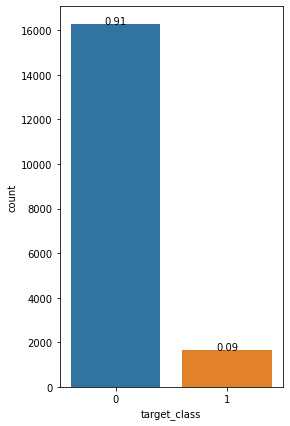

In [15]:
# Visualizing the distribution of Target Class
plt.figure(figsize = (4, 7))
total = float(len(df))
ax = sns.countplot(x = 'target_class', data = df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 


## Histogram Plots


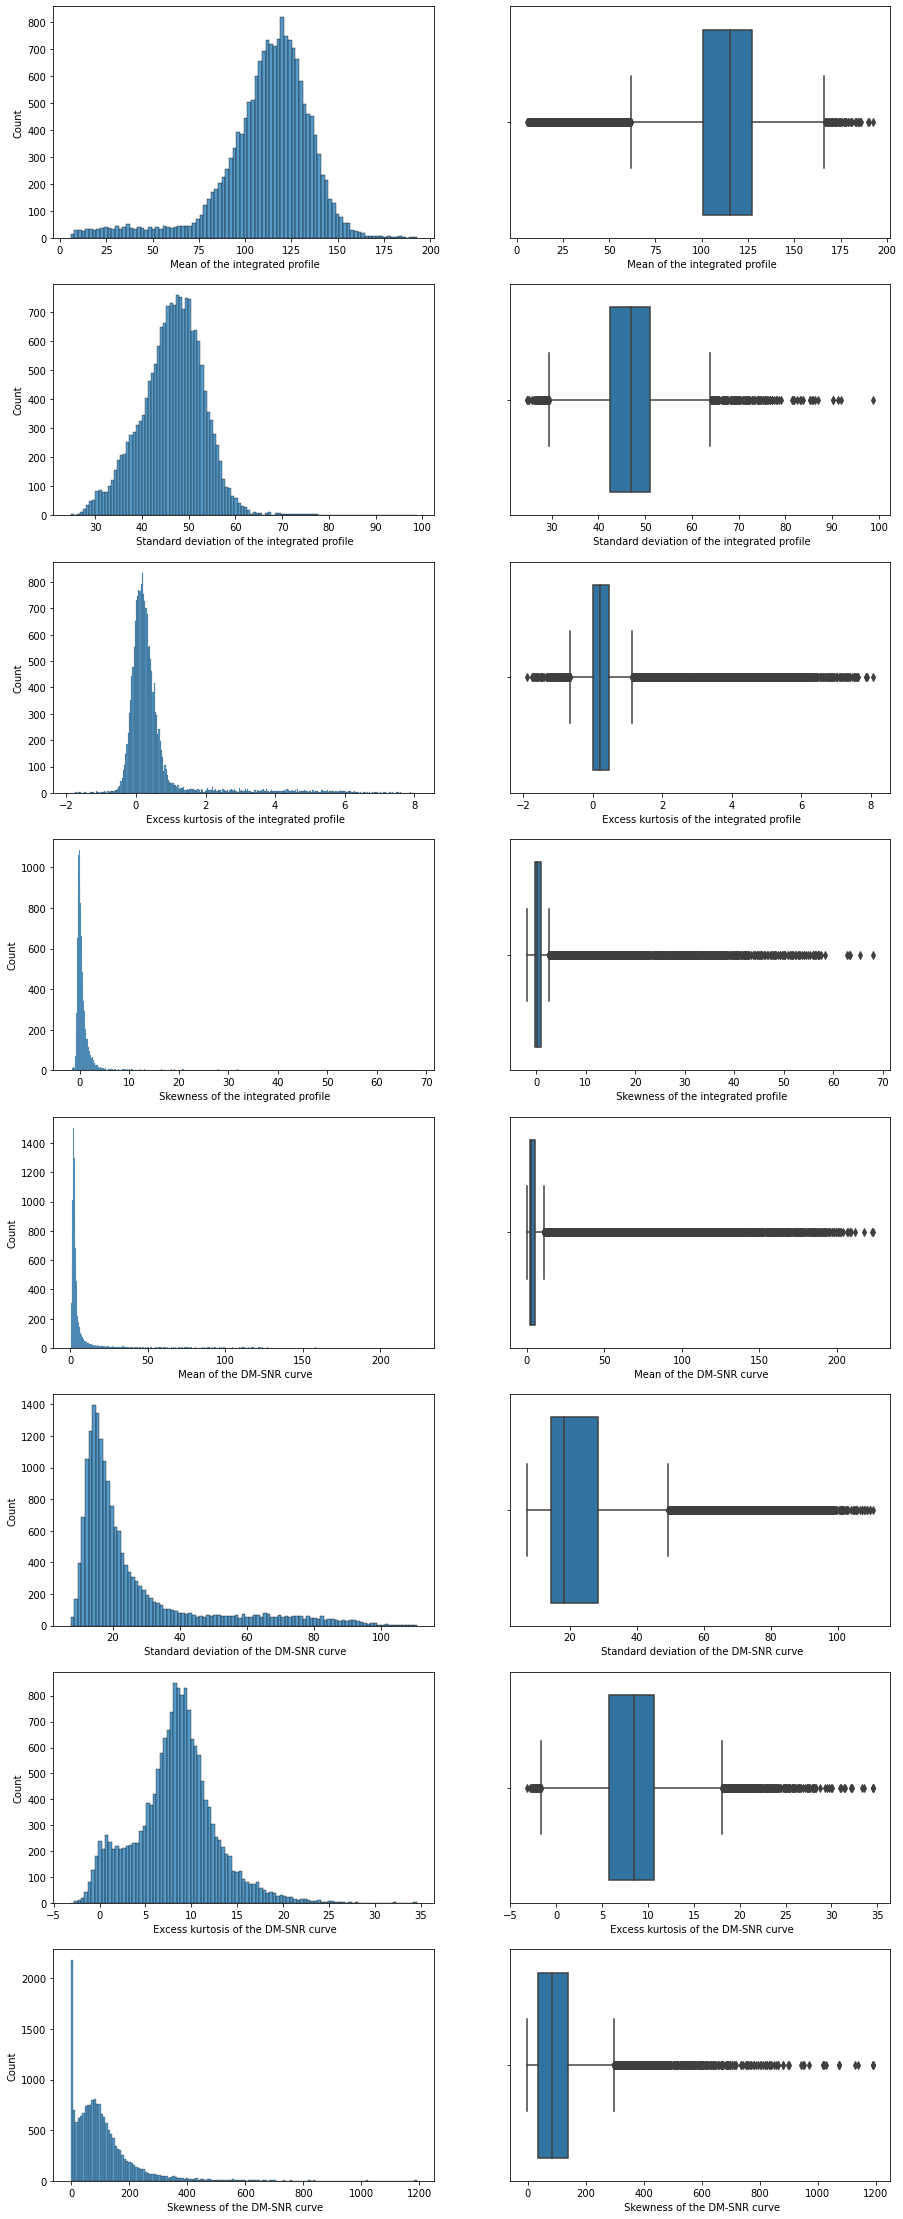

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [16]:
fig, axes = plt.subplots(nrows=len(columns),ncols=2,  figsize=(15, 40))
for i in range(len(columns)):
    feature = columns[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i][0])
    sns.boxplot(x=data[feature].dropna(), ax=axes[i][1])

We can expect a mean around 50 with a high standard deviation almost comparable to the mean. Not very skewed (slightly towards the right) and slightly fat tails.

     -Mean Very few outliers, amost a normal distribution except for a large left tail
     -Std. Dev Almost no outliers, a normal distribution with a tail to right of mean
     -Excess Kurtosis Highly crowded, few outliers in the form of a long tail to the right
     -Skewness Highly crowded, few outliers in the form of a long tail to the right
### DM-SNR Curve
We can expect a mean around 50 with a high standard deviation almost comparable to the mean. Not very skewed (slightly towards the right) and slightly fat tails.

     -Mean Highly crowded, skewed towards the right, with a long tail.
     -Std. Dev Right skewed, with a fat right tail.
     -Excess Kurtosis Left skewed normal distribution. Minimal tails.
     -Skewness Highly right skewed with a long right tail


/home/badr/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target_class', ylabel='count'>

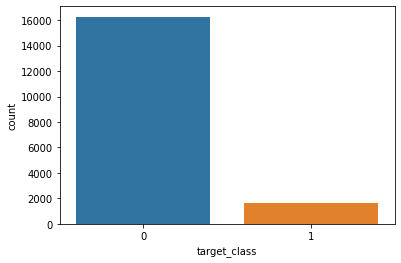

In [17]:
sns.countplot(df["target_class"])

# Data preprocessing


Splitting the column and Label fields


In [18]:
labels = df.target_class.values

df.drop(["target_class"],axis=1,inplace=True)

columns = df.values


Scaling the column


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))

column_scaled = scaler.fit_transform(columns)

In [20]:
columns.shape

(17898, 8)


Splitting the Train and the Test rows 

used from sklearn.model_selection import train_test_split


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(column_scaled,labels,test_size=0.2)

In [22]:
# the shap of data

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(3580, 8)
(14318, 8)
(3580,)
(14318,)


# Machine Learning Models

### Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")

lr_model.fit(X_train,y_train)

y_head_lr = lr_model.predict(X_test)

lr_score = lr_model.score(X_test,y_test)
print(lr_score)

cm_lr=classification_report(y_test,y_head_lr)
print("================================================================")
print('Classification report for KNN Classification: \n',cm_lr)
print("================================================================")

0.982122905027933
Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3247
           1       0.96      0.85      0.90       333

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### Decision Tree Classifier 

In [40]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier(random_state=42)

dc_model.fit(X_train,y_train)

y_head_dc = dc_model.predict(X_test)

dc_score = dc_model.score(X_test,y_test)
print(dc_score)

cm_dc=classification_report(y_test,y_head_dc)
print("================================================================")
print('Classification report for KNN Classification: \n',cm_dc)
print("================================================================")

0.9687150837988827
Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3247
           1       0.81      0.86      0.84       333

    accuracy                           0.97      3580
   macro avg       0.90      0.92      0.91      3580
weighted avg       0.97      0.97      0.97      3580



### Random Forest Classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=37,random_state=42,max_leaf_nodes=200,criterion="entropy")

rfc_model.fit(X_train,y_train)

y_head_rfc = rfc_model.predict(X_test)

rfc_score = rfc_model.score(X_test,y_test)
print(rfc_score)

cm_rfc=classification_report(y_test,y_head_rfc)
print("================================================================")
print('Classification report for KNN Classification: \n',cm_rfc)
print("================================================================")

0.9826815642458101
Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3247
           1       0.94      0.87      0.90       333

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.95      3580
weighted avg       0.98      0.98      0.98      3580



### Naive Bayes Classifier 

In [42]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train,y_train)

y_head_nb = nb_model.predict(X_test)

nb_score = nb_model.score(X_test,y_test)
print(nb_score)

cm_nb=classification_report(y_test,y_head_nb)
print("================================================================")
print('Classification report for KNN Classification: \n',cm_nb)
print("================================================================")

0.9497206703910615
Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      3247
           1       0.68      0.88      0.76       333

    accuracy                           0.95      3580
   macro avg       0.83      0.92      0.87      3580
weighted avg       0.96      0.95      0.95      3580



### KNN 

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7,weights="distance")

knn_model.fit(X_train,y_train)

y_head_knn = knn_model.predict(X_test)

knn_score = knn_model.score(X_test,y_test)
print(knn_score)

cm_knn=classification_report(y_test,y_head_knn)
print("================================================================")
print('Classification report for KNN Classification: \n',cm_knn)
print("================================================================")

0.979050279329609
Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3247
           1       0.92      0.84      0.88       333

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### Support Vector Machine 

In [44]:
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report

svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)

svm_model.fit(X_train,y_train)

y_head_svm = svm_model.predict(X_test)

svm_score = svm_model.score(X_test,y_test)
print(svm_score)

cr_svm=classification_report(y_test,y_head_svm)
print("================================================================")
print('Classification report for SVM Classification: \n',cr_svm)
print("================================================================")

0.9832402234636871
Classification report for SVM Classification: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3247
           1       0.94      0.87      0.91       333

    accuracy                           0.98      3580
   macro avg       0.97      0.93      0.95      3580
weighted avg       0.98      0.98      0.98      3580



# Model Performance


Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dc = confusion_matrix(y_test,y_head_dc)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rfc = confusion_matrix(y_test,y_head_rfc)
cm_svm = confusion_matrix(y_test,y_head_svm)


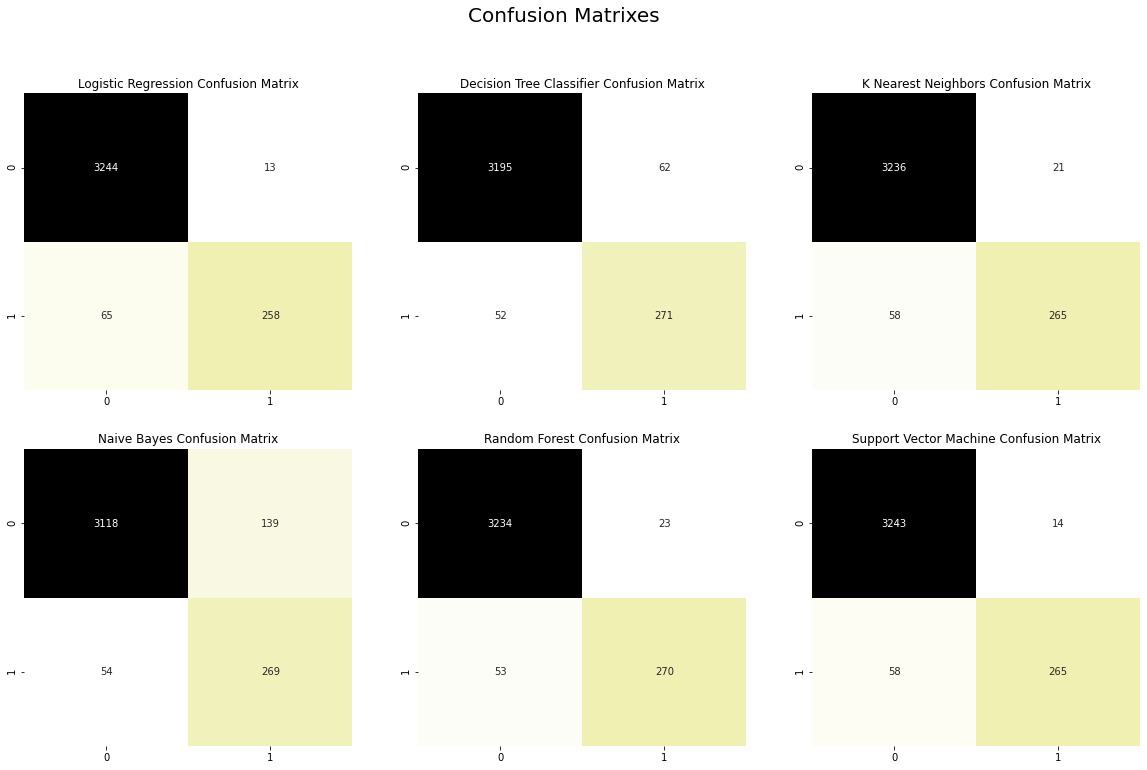

In [34]:
plt.figure(figsize=(20,12))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,6)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()





  if we compare total mistakes     : RandomForest, SVM, KNN seem to be best for this dataset


 
## Models with Bar Chart Comparison

/home/badr/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


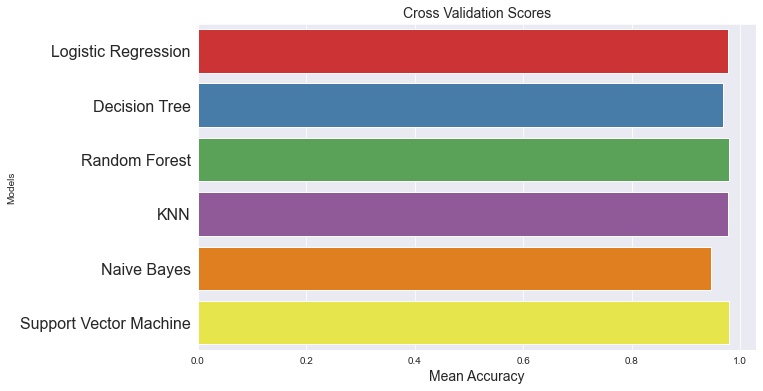

In [35]:
sns.set_style("darkgrid")
Models = ("Logistic Regression","Decision Tree","Random Forest","KNN","Naive Bayes","Support Vector Machine")
scores = (lr_score,dc_score,rfc_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("gray","red","purple","b","orange","y")

cv_results = pd.DataFrame({"Cross Validation Means":scores,
                           "Models":["Logistic Regression", "Decision Tree",
                                     "Random Forest",
                                     "KNN",
                                     "Naive Bayes",
                                     "Support Vector Machine"]})

plt.figure(figsize = (10,6))
sns.barplot("Cross Validation Means", "Models",
            data = cv_results, palette = "Set1")
plt.xlabel("Mean Accuracy",
           size = 14)
plt.yticks(size = 16)
plt.title("Cross Validation Scores",
          size = 14)
plt.show()




# Conclusion

After my tests I see that:

* KNN ------------------------->  0.97
* Random Forset  -------------->  0.97
* SVM ------------------------->  0.98

are Overall winnners in my case above.

But all of these 6 models did a great job on predicting
